# CHAPTER 7: INTRODUCTION TO MACHINE LEARNING AND REGRESSION
**(Week 11-12: Lecture Notes)**

---

## 1. INTRODUCTION: TRADITIONAL PROGRAMMING VS. MACHINE LEARNING

**1. Traditional Programming:** WE write the rules.
*   **Input:** Data + Rules (If-Else) -> **Output:** Answer
*   *Example:* "If temperature exceeds 100 degrees, sound the alarm."

**2. Machine Learning (ML):** The COMPUTER finds the rules.
*   **Input:** Data + Answers -> **Output:** Rules (Model)
*   *Example:* "Here is the temperature and failure data of 1000 past engines. You find the relationship (rule) and tell me when the new engine will break down."


---
# WEEK 11: MACHINE LEARNING FUNDAMENTALS

## 11.1. TYPES OF LEARNING (The Map)

Machine learning is divided into 3 main branches:

**A) Supervised Learning** (The Focus of Our Course)
We have labeled data (an answer key). It's like learning with a teacher.
*   **Input:** House features (Number of rooms, m²).
*   **Target (Label):** Price of the house.
*   **Goal:** To predict the price when seeing the features of a new house.
*   **Divided into two:**
    1.  **Regression:** Numerical prediction (Price, Temperature, Speed).
    2.  **Classification:** Category prediction (Cat/Dog, Sick/Healthy).

**B) Unsupervised Learning**
There is no answer key. We leave the data alone and expect it to group itself.
*   **Clustering:** Segmenting customers.

**C) Reinforcement Learning**
Reward and Punishment system. (Robot learning to walk, AI playing Mario).


---
## 11.2. TRAIN / TEST SPLIT (The Most Critical Concept)

How do we understand if a student has learned a subject? If we ask the exact same questions solved in class (Training) on the exam, they might memorize them. If we ask new questions they haven't seen (Test), we understand if they truly learned.

ML Models are the same:
1.  **Training Set (Train - 80%):** Used to build the model.
2.  **Test Set (Test - 20%):** Set aside to evaluate the model. (The model never sees this data!).


In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Let's create our small dataset manually
data = {
    "Room_Count": [2, 3, 3, 4, 5, 2, 4, 3, 1, 5],
    "Square_Meters":  [85, 110, 120, 140, 180, 75, 130, 115, 50, 200],
    "Price":       [2000, 3000, 3200, 4500, 6000, 1800, 4200, 3100, 1200, 6500]
}
df = pd.DataFrame(data)

# Features (Inputs)
X = df[["Room_Count", "Square_Meters"]] 

# Target (Output)
y = df["Price"]                       

# Splitting Data (Randomly set aside 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's check
print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")


Number of training samples: 8
Number of test samples: 2


---
# WEEK 12: PREDICTING THE FUTURE WITH REGRESSION

Regression is the art of predicting a dependent variable ($y$) using independent variables ($x$).

## 12.1. SIMPLE AND MULTIPLE LINEAR REGRESSION

*   **Simple Regression:** There is a single factor. (Formula: $y = b_0 + b_1x$)
    *   *Example:* Predicting price looking only at the square footage of the house.
*   **Multiple Regression:** There are multiple factors. (Real life).
    *   Formula: $y = b_0 + b_1x_1 + b_2x_2 + ...$
    *   *Example:* Predicting price looking at Square Footage, Room Count, Building Age, Floor... everything.


---
## 12.2. MODELING WITH SCIKIT-LEARN (The 4-Step Rule)

There is a standard "recipe" for doing ML in Python. All models work with these same 4 steps.

**Scenario:** Predicting Sales based on Advertising spend (TV, Radio, Newspaper).
*(Note: Since we don't have the file, we will create a dummy dataset below to make the code runnable)*


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Creating Dummy Data (Normally we would load this via pd.read_csv)
data = {
    'TV': np.random.randint(10, 200, 100),
    'Radio': np.random.randint(5, 50, 100),
    'Newspaper': np.random.randint(0, 40, 100),
    'Sales': np.random.randint(1000, 5000, 100)
}
df = pd.DataFrame(data)

# 1. Prepare Data
# WARNING: Don't forget to clean empty cells (NaN) if any!
df.dropna(inplace=True) 

X = df[["TV", "Radio", "Newspaper"]] # Inputs
y = df["Sales"]                      # Target

# 2. Split Data (Train/Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and Train Model (FIT) -> The Moment the Machine Learns
model = LinearRegression()
model.fit(X_train, y_train) 
# Right now, the model has found the coefficients.

# 4. Make Predictions (PREDICT) -> Exam Time
y_pred = model.predict(X_test)

print("Predictions completed.")


Predictions completed.


---
## 12.3. MODEL EVALUATION (Success Metrics)

1.  **MSE / RMSE:** The amount of error. The RMSE result is in the same unit as the target variable (e.g., ±5000 TL error).
2.  **R² (Coefficient of Determination):** How well the model explains the data (between 0 and 1).


In [5]:
# Let's Measure Success
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5 # Square root
r2 = r2_score(y_test, y_pred)

print("Error Margin (RMSE):", rmse)
print("Model Success (R2):", r2)


Error Margin (RMSE): 1301.6040622763655
Model Success (R2): -0.05662299602869303


### Visual Evaluation (Show Time!)
Numbers can be cold, let's clarify the situation with a graph:


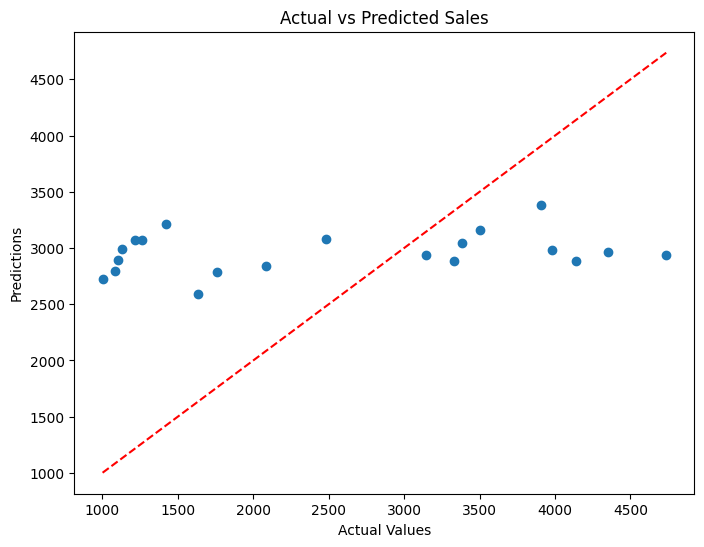

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Actual values vs Predictions plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")

# Perfect prediction line (Red)
# If points are on this line, the prediction is perfect
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 

plt.title("Actual vs Predicted Sales")
plt.show()

# Interpretation: The closer the points are to the red line, the better the model.


---
## 12.4. ENGINEERING APPLICATION: CONCRETE STRENGTH PREDICTION

**Data:** Cement, Water, Aggregate, Age (Days). **Target:** Compressive Strength (MPa).
*(Assuming 'model' was trained on concrete data - theoretical code block)*


In [8]:
import pandas as pd

# Listeyi DataFrame'e çeviriyoruz ve sütun isimlerini aynen veriyoruz
# (Not: Sütun isimleri modeli eğitirken kullandıklarınla birebir aynı olmalı)
new_sample_df = pd.DataFrame([[300, 150, 100]], columns=["TV", "Radio", "Newspaper"])

# Tahmini DataFrame ile yap
prediction = model.predict(new_sample_df)

print(f"Predicted Sales: {prediction[0]:.2f}")


Predicted Sales: 1010.16


---
## 7. WEEKLY HOMEWORK (Challenge)

**Task:** Using the "Car Price Prediction" dataset (or a similar one):

1.  Load the data and clean missing values (use `dropna()`).
2.  Select the "Price" column as target (**y**), and other numerical columns (Year, Engine Volume, Km, etc.) as input (**X**). (Do not take text columns!)
3.  Split the data as 20% Test, 80% Training.
4.  Build and Train the Linear Regression model.
5.  Report the **R²** and **RMSE** values on the Test data.
6.  **(Bonus):** Visualize the actual values vs predictions with a scatter plot.
